# Calibrating the velocity field against observations 

In [1]:
# Copyright (C) 2024 Richard Stiskalek
# This program is free software; you can redistribute it and/or modify it
# under the terms of the GNU General Public License as published by the
# Free Software Foundation; either version 3 of the License, or (at your
# option) any later version.
#
# This program is distributed in the hope that it will be useful, but
# WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General
# Public License for more details.
#
# You should have received a copy of the GNU General Public License along
# with this program; if not, write to the Free Software Foundation, Inc.,
# 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301, USA.
import numpy as np
import matplotlib.pyplot as plt

from flow_bulk import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Enclosed overdensity

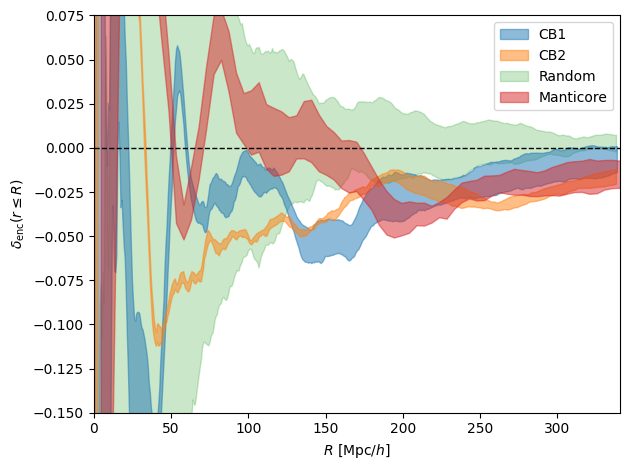

In [7]:
plt.figure()
cols = plt.rcParamsDefault['axes.prop_cycle'].by_key()['color']

r, overdensity = read_enclosed_density("csiborg1")
c = cols[0]
ymin = np.percentile(overdensity, 16, axis=0)
ymed = np.median(overdensity, axis=0)
ymax = np.percentile(overdensity, 84, axis=0)
plt.fill_between(r, ymin, ymax, color=c, alpha=0.5, label="CB1")


r, overdensity = read_enclosed_density("csiborg2_main")
c = cols[1]
ymin = np.percentile(overdensity, 16, axis=0)
ymed = np.median(overdensity, axis=0)
ymax = np.percentile(overdensity, 84, axis=0)
plt.fill_between(r, ymin, ymax, color=c, alpha=0.5, label="CB2")


r, overdensity = read_enclosed_density("csiborg2_random")
c = cols[2]
ymin = np.percentile(overdensity, 16, axis=0)
ymed = np.median(overdensity, axis=0)
ymax = np.percentile(overdensity, 84, axis=0)
plt.fill_between(r, ymin, ymax, color=c, alpha=0.25, label="Random", zorder=-1)

r, overdensity = read_enclosed_density("csiborg2X")
c = cols[3]
ymin = np.percentile(overdensity, 16, axis=0)
ymed = np.median(overdensity, axis=0)
ymax = np.percentile(overdensity, 84, axis=0)
plt.fill_between(r / 0.7, ymin, ymax, color=c, alpha=0.5, label="Manticore")



plt.xlabel(r"$R ~ [\mathrm{Mpc} / h]$")
plt.ylabel(r"$\delta_{\rm enc} (r \leq R)$")
plt.legend()

plt.xlim(0, r.max())
plt.ylim(-0.15, 0.075)
plt.axhline(0, c='k', ls='--', lw=1)
plt.tight_layout()
plt.savefig("../../plots/enclosed_density.png", dpi=450)
plt.show()

## Enclosed bulk flow

In [37]:
r, Vmag, l, b = read_enclosed_flow("csiborg1")

(101, 500, 3)


In [38]:
r, Vmag, l, b = read_enclosed_flow("csiborg2X")

(2, 100, 3)


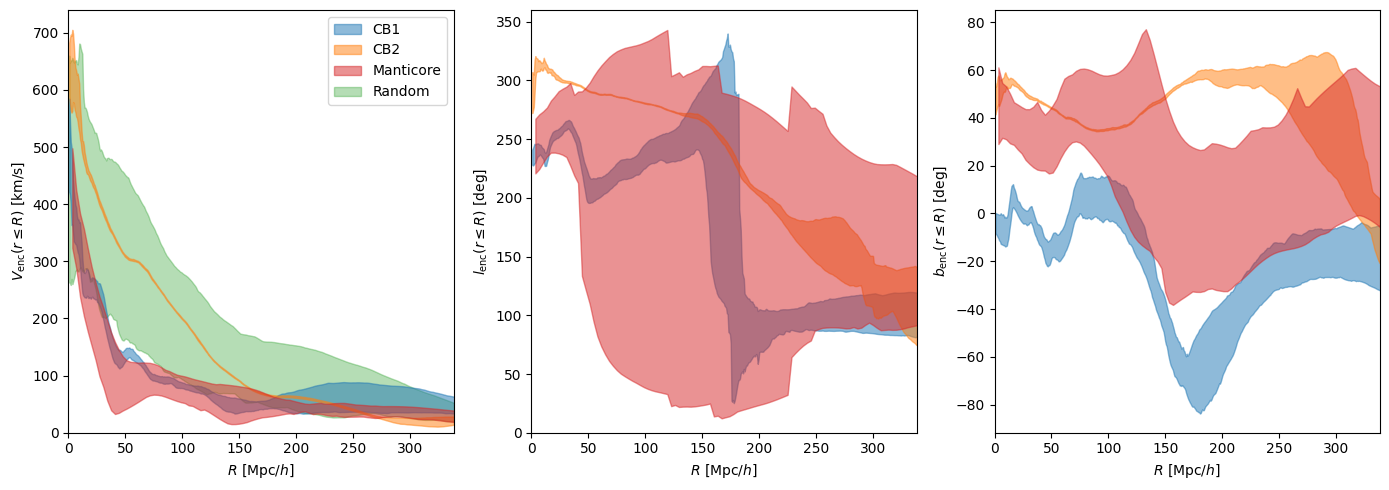

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
cols = plt.rcParamsDefault['axes.prop_cycle'].by_key()['color']
thin_line_kwargs = {"lw": 0.3, "zorder": 0, "ls": "dotted"}

# CSiBORG1
r, Vmag, l, b = read_enclosed_flow("csiborg1")
c = cols[0]
for i, y in enumerate([Vmag, l, b]):
    ymin, ymed, ymax = np.percentile(y, [16, 50, 84], axis=0)
    axs[i].fill_between(r, ymin, ymax, color=c, alpha=0.5, label="CB1")

# CSiBORG2
r, Vmag, l, b = read_enclosed_flow("csiborg2_main")
c = cols[1]
for i, y in enumerate([Vmag, l, b]):
    ymin, ymed, ymax = np.percentile(y, [16, 50, 84], axis=0)
    axs[i].fill_between(r, ymin, ymax, color=c, alpha=0.5, label="CB2")

# Manticore
r, Vmag, l, b = read_enclosed_flow("csiborg2X")
c = cols[3]
for i, y in enumerate([Vmag, l, b]):
    ymin, ymed, ymax = np.percentile(y, [16, 50, 84], axis=0)
    axs[i].fill_between(r, ymin, ymax, color=c, alpha=0.5, label="Manticore")


# Random
r, Vmag, l, b = read_enclosed_flow("csiborg2_random")
c = cols[2]
ymin = np.percentile(Vmag, 16, axis=0)
ymax = np.percentile(Vmag, 84, axis=0)
ymed = np.median(Vmag, axis=0)
axs[0].fill_between(r, ymin, ymax, color=c, alpha=0.35, zorder=-1,
                    label="Random")


axs[0].legend()
for i in range(3):
    axs[i].set_xlabel(r"$R ~ [\mathrm{Mpc} / h]$")
    axs[i].set_xlim(0, r.max())

axs[0].set_ylim(0)
axs[0].set_ylabel(r"$V_{\rm enc} (r \leq R) ~ [\mathrm{km} / \mathrm{s}]$")
axs[1].set_ylabel(r"$l_{\rm enc} (r \leq R) ~ [\mathrm{deg}]$")
axs[2].set_ylabel(r"$b_{\rm enc} (r \leq R) ~ [\mathrm{deg}]$")
axs[1].set_ylim(0, 360)

fig.tight_layout()
fig.savefig("../../plots/enclosed_flow.png", dpi=450)
fig.show()

## Enclosed overdensity $\texttt{BORG2}$ all

In [22]:
paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)
nsims = paths.get_ics("borg2_all")

r, overdensity = read_enclosed_density("borg2_all")
overdensity_A = overdensity[:80]
overdensity_B = overdensity[80:][::30]

In [25]:
nsims[:80]

array([ 7500,  7600,  7700,  7800,  7900,  8000,  8100,  8200,  8300,
        8400,  8500,  8600,  8700,  8800,  8900,  9000,  9100,  9200,
        9300,  9400,  9500,  9600,  9700,  9800,  9900, 10000, 10100,
       10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000,
       11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900,
       12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800,
       12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700,
       13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600,
       14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400])

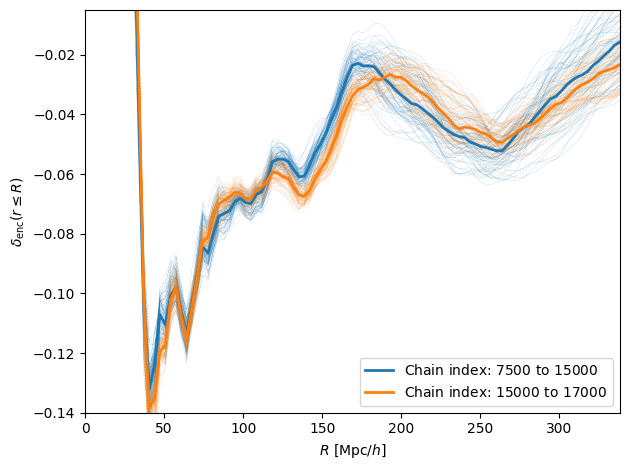

In [40]:
plt.figure()
cols = plt.rcParamsDefault['axes.prop_cycle'].by_key()['color']

# r, overdensity = read_enclosed_density("csiborg1")
c = cols[0]
for i in range(len(overdensity_A)):
    plt.plot(r, overdensity_A[i], c=c, lw=0.2, zorder=0, ls="dotted")
plt.plot(r, np.median(overdensity_A, axis=0), c=c, lw=2, label=r"Chain index: $7500$ to $15000$")

c = cols[1]
for i in range(len(overdensity_B)):
    plt.plot(r, overdensity_B[i], c=c, lw=0.2, zorder=0, ls="dotted")
plt.plot(r, np.median(overdensity_B, axis=0), c=c, lw=2, label=r"Chain index: $15000$ to $17000$")



plt.xlabel(r"$R ~ [\mathrm{Mpc} / h]$")
plt.ylabel(r"$\delta_{\rm enc} (r \leq R)$")
plt.legend()

plt.xlim(0, r.max())
plt.ylim(-0.14, -0.005)
plt.axhline(0, c='k', ls='--', lw=1)
plt.tight_layout()
plt.savefig("../../plots/enclosed_density_BORG2.png", dpi=450)
plt.show()